# Machine Learning with Python

## 1.5 Homework

### 0

Find a dataset that interests you that will be suitable for *supervised learning*:

At least one of the variables should be a *target* value that would be interesting to predict.
This will be either
* a class label (for classification) or 
* a numerical value (for regression)

There should be sufficient features to make the problem interesting - at least 4 non-target columns.

There should be sufficient data points to allow for meaningful cross-validation - at least 100 rows.

Your dataset could be loaded directly from [OpenML](https://www.openml.org/home) or from a CSV file that you have prepared.

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spambase = fetch_openml(name='spambase')

spambase.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
spambase.target

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: category
Categories (2, object): ['0', '1']

In [3]:
spambase.DESCR

'**Author**: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt    \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/spambase)   \n**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)\n\nSPAM E-mail Database  \nThe "spam" concept is diverse: advertisements for products/websites, make money fast schemes, chain letters, pornography... Our collection of spam e-mails came from our postmaster and individuals who had filed spam.  Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word \'george\' and the area code \'650\' are indicators of non-spam.  These are useful when constructing a personalized spam filter.  One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.\n \nFor background on spam:  \nCranor, Lorrie F., LaMacchia, Brian A.  Spam! Communications of the ACM, 41(8):74-83, 1998.  \n\n### Attribute Information:  \nThe las

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    spambase.data, spambase.target, random_state=0)

In [5]:


# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
spambase_dataframe = pd.DataFrame(X_train, columns=spambase.feature_names)

# create a scatter matrix from the dataframe, color by y_train
#pd.plotting.scatter_matrix(spambase_dataframe, c=y_train_vis, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)


In [6]:
spambase_dataframe.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
118,0.0,0.0,0.00,0.0,1.28,0.00,2.56,1.28,1.28,1.28,...,0.0,0.0,0.000,0.0,0.542,0.000,0.000,102.666,304.0,308.0
261,0.0,0.0,0.15,0.0,0.31,0.00,0.15,0.00,0.63,0.15,...,0.0,0.0,0.088,0.0,0.862,0.707,0.022,5.423,51.0,1128.0
598,0.0,0.0,0.00,0.0,0.00,1.12,0.00,0.00,0.00,0.00,...,0.0,0.0,0.392,0.0,3.333,0.000,0.000,2.551,12.0,74.0
1770,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.08,...,0.0,0.0,0.000,0.0,2.152,0.000,0.000,5.210,36.0,99.0
905,0.0,0.0,0.76,0.0,0.76,0.00,0.50,0.50,0.00,1.01,...,0.0,0.0,0.078,0.0,0.433,0.433,0.000,2.441,19.0,249.0


### 1

Produce a visualisation of the whole dataset using a dimensionality reduction technique of your choice.

In [7]:
print(X_train.shape)
print(X_test.shape)

(3450, 57)
(1151, 57)


In [8]:
spam = X_train[y_train=='1']
not_spam = X_train[y_train=='0']

In [9]:
spam.iloc[:,0]

118     0.00
261     0.00
598     0.00
1770    0.00
905     0.00
        ... 
537     0.00
1701    1.06
705     0.00
1033    0.17
1653    0.43
Name: word_freq_make, Length: 1353, dtype: float64

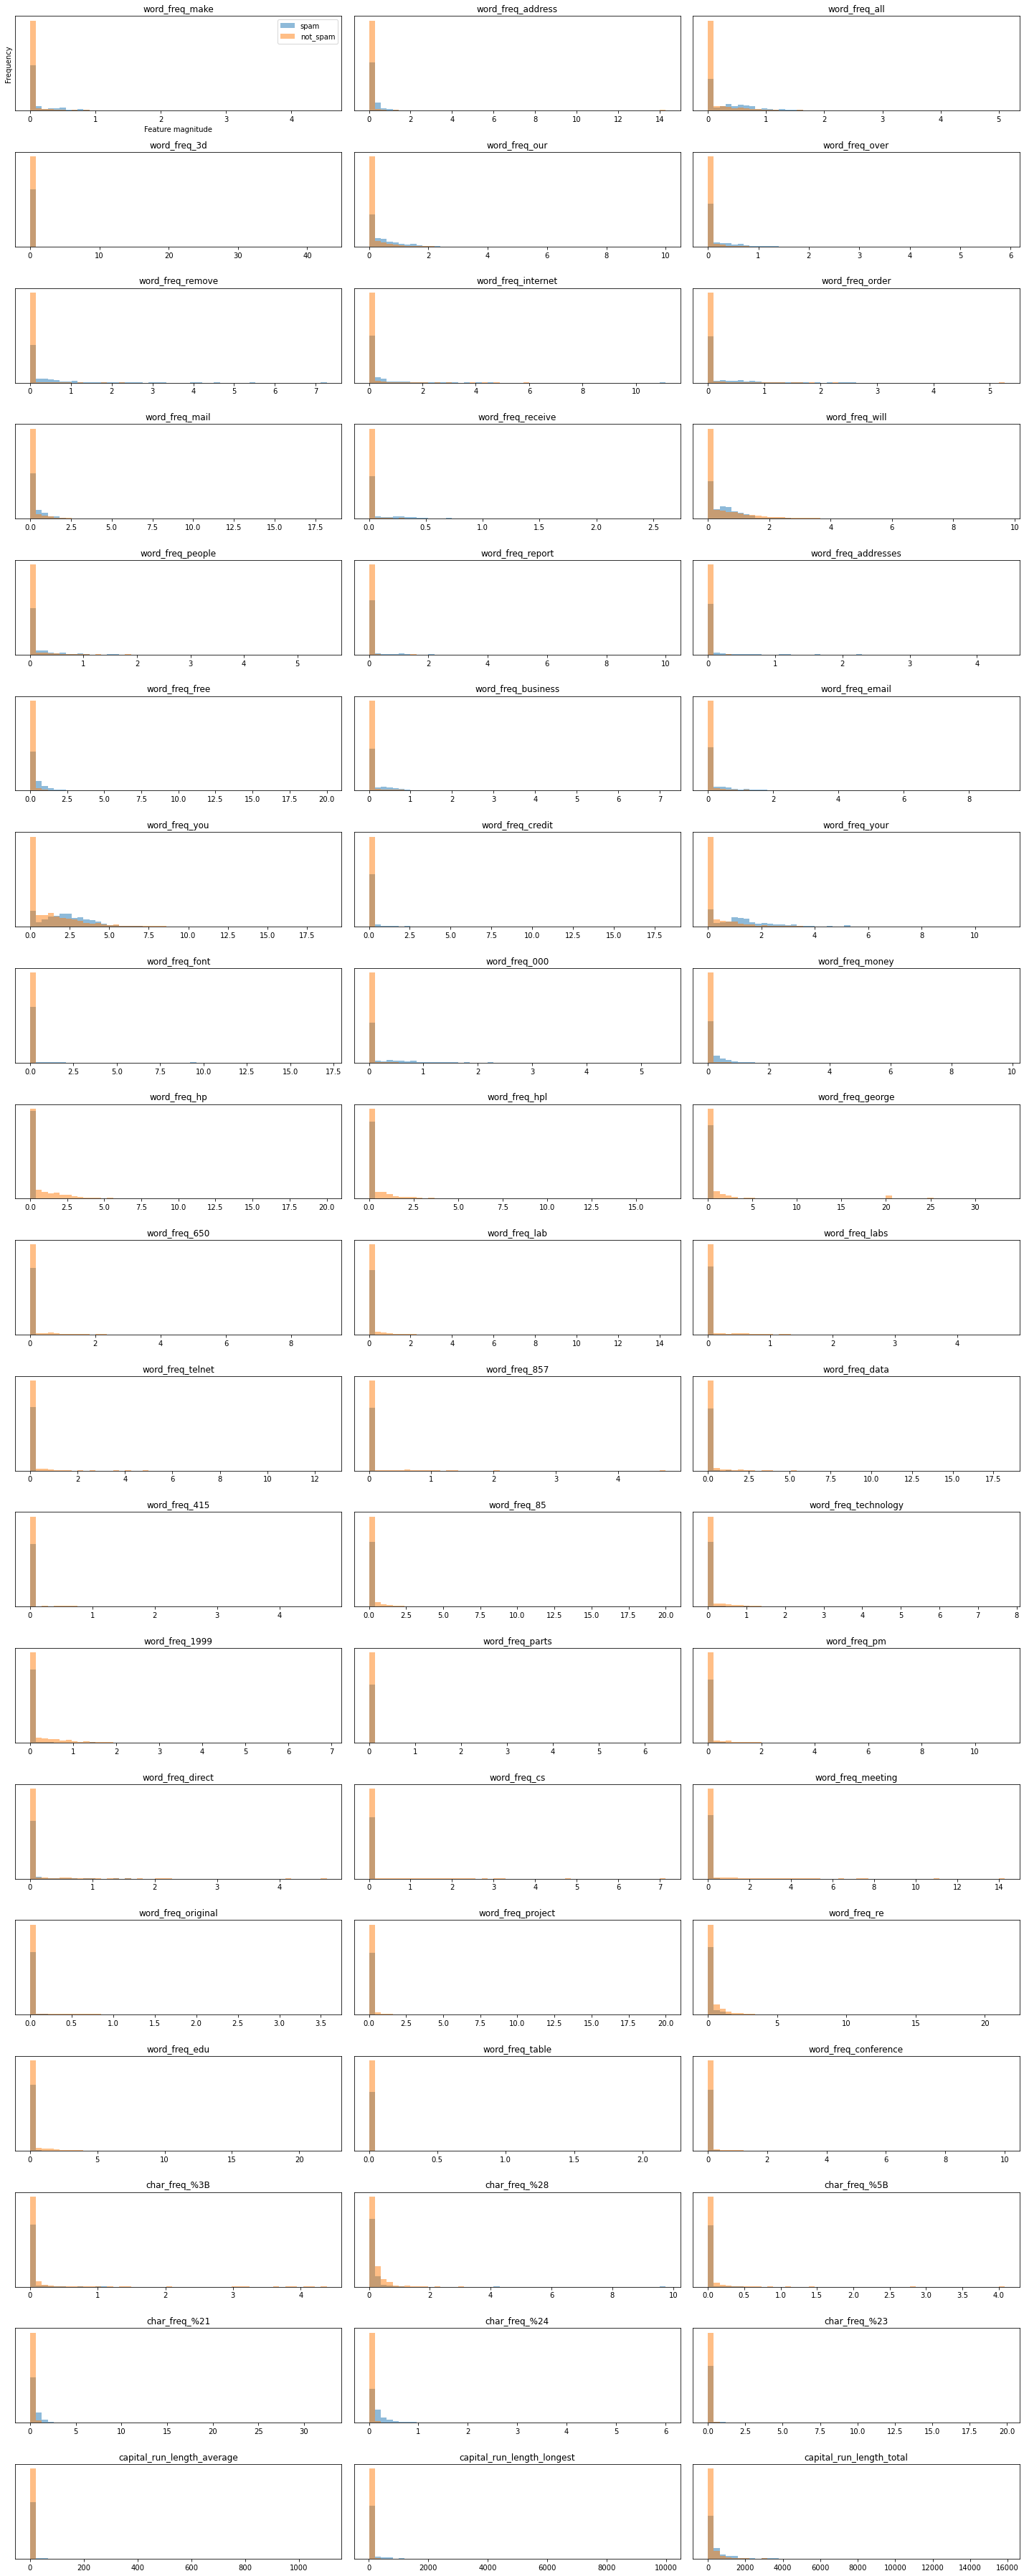

In [10]:
fig, axes = plt.subplots(19, 3, figsize=(20, 50))
spam = X_train[y_train=='1']
not_spam = X_train[y_train=='0']

ax = axes.ravel()

for i in range(57):
    _, bins = np.histogram(X_train.iloc[:,i], bins=50)
    ax[i].hist(spam.iloc[:,i], bins=bins, alpha=.5)
    ax[i].hist(not_spam.iloc[:,i], bins=bins, alpha=.5)
    ax[i].set_title(spambase.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["spam", "not_spam"], loc="best")
fig.tight_layout()

In [11]:
from sklearn.preprocessing import StandardScaler

# make a new Scaler object
scaler = StandardScaler()

# calling fit and transform in sequence (using method chaining)
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)


In [12]:
from sklearn.decomposition import PCA

components=5

# keep the first two principal components of the data
pca = PCA(n_components=components)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (3450, 57)
Reduced shape: (3450, 5)


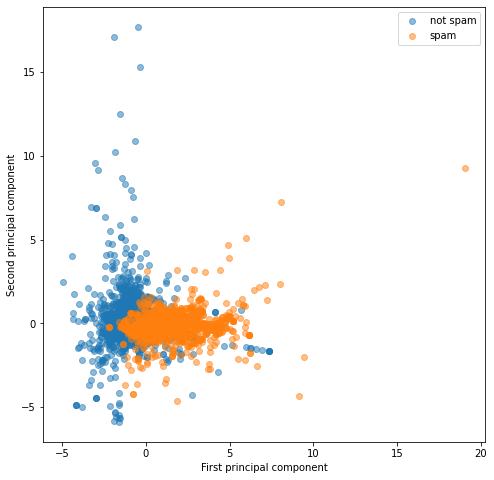

In [13]:
# plot first vs. second principal component, colored by class
pcax = 1
pcay = 4

plt.figure(figsize=(8, 8))
plt.scatter(X_pca[y_train=='0', pcax], X_pca[y_train=='0', pcay], label="not spam", alpha=0.5)
plt.scatter(X_pca[y_train=='1', pcax], X_pca[y_train=='1', pcay], label="spam", alpha=0.5)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
emails_tsne = tsne.fit_transform(X_scaled)

/home/francesco/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/francesco/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 't-SNE feature 1')

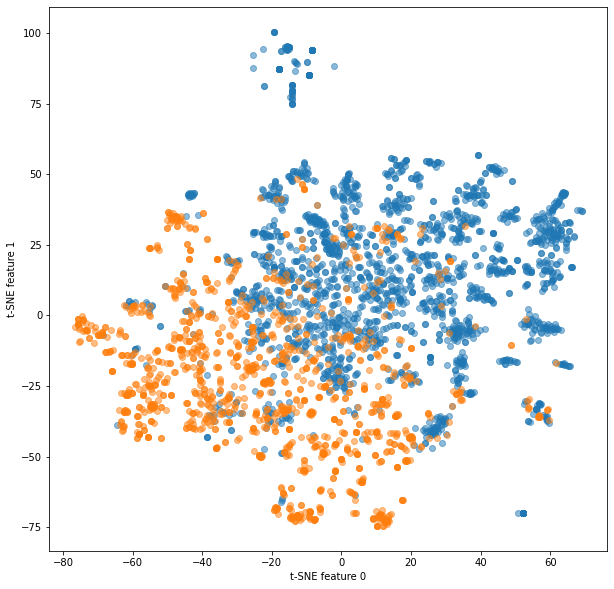

In [15]:
plt.figure(figsize=(10, 10))

plt.scatter(emails_tsne[y_train=='0', 0], emails_tsne[y_train=='0', 1], label="not spam", alpha=0.5)
plt.scatter(emails_tsne[y_train=='1', 0], emails_tsne[y_train=='1', 1], label="spam", alpha=0.5)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

### 2
Apply a clustering algorithm to the data and evaluate the results in an appropriate way.

In [16]:
from sklearn.cluster import KMeans
# build the clustering model
kmeans = KMeans(n_clusters=2)
kmeans.fit(emails_tsne)

KMeans(n_clusters=2)

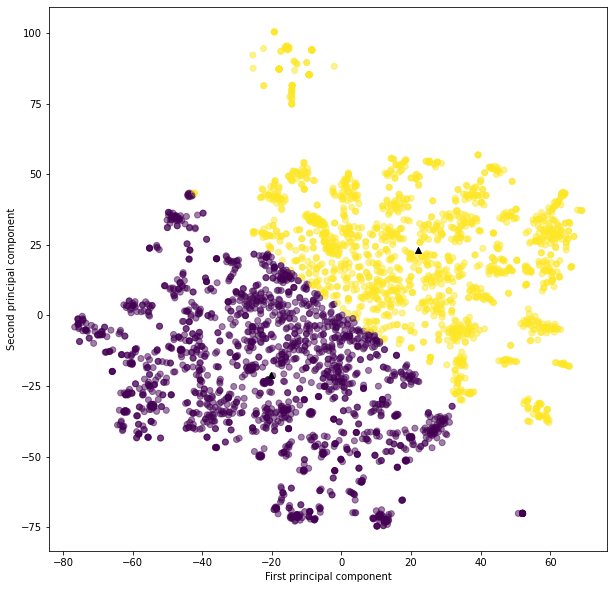

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(emails_tsne[:, 0], emails_tsne[:, 1], c=kmeans.labels_, alpha=0.5)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    c='k',
    marker='^')

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.show()

In [18]:
X_test.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
991,0.1,0.20,1.01,0.0,0.80,0.80,0.5,0.00,0.8,0.10,...,0.0,0.000,0.111,0.000,0.491,0.158,0.015,8.550,669.0,1351.0
2565,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.552,0.000,0.000,0.000,0.000,1.000,1.0,4.0
1906,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.666,4.0,15.0
1471,0.0,0.82,0.32,0.0,1.14,0.32,0.0,0.16,0.0,0.65,...,0.0,0.000,0.000,0.000,0.000,0.290,0.029,2.257,13.0,158.0
1813,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.022,0.022,0.019,0.022,0.022,0.022,3.482,5.0,5902.0


In [19]:
X_test_scaled = scaler.transform(X_test)

In [20]:
X_test_tnse = tsne.fit_transform(X_test_scaled)

/home/francesco/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/francesco/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 't-SNE feature 1')

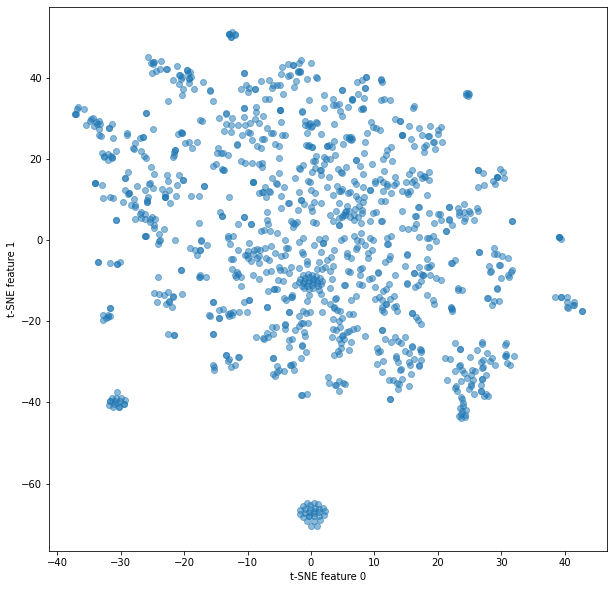

In [21]:
plt.figure(figsize=(10, 10))

plt.scatter(X_test_tnse[:, 0], X_test_tnse[:, 1], alpha=0.5)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

In [22]:
y_pred = kmeans.predict(X_test_tnse) #need to downgrade numpy!!!!!!

Text(0, 0.5, 't-SNE feature 1')

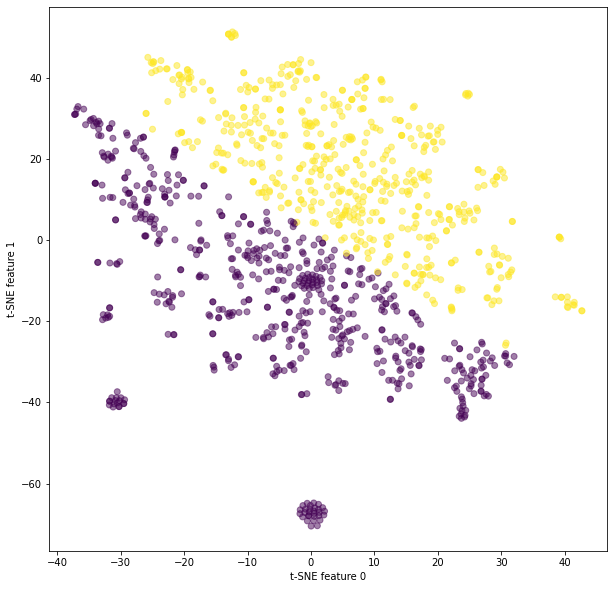

In [26]:
plt.figure(figsize=(10, 10))

plt.scatter(X_test_tnse[:, 0], X_test_tnse[:, 1], c=y_pred, alpha=0.5)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

In [23]:
from sklearn.metrics import classification_report
y_test = [int(i) for i in y_test]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       691
           1       0.55      0.65      0.60       460

    accuracy                           0.65      1151
   macro avg       0.64      0.65      0.64      1151
weighted avg       0.66      0.65      0.65      1151



Text(0, 0.5, 't-SNE feature 1')

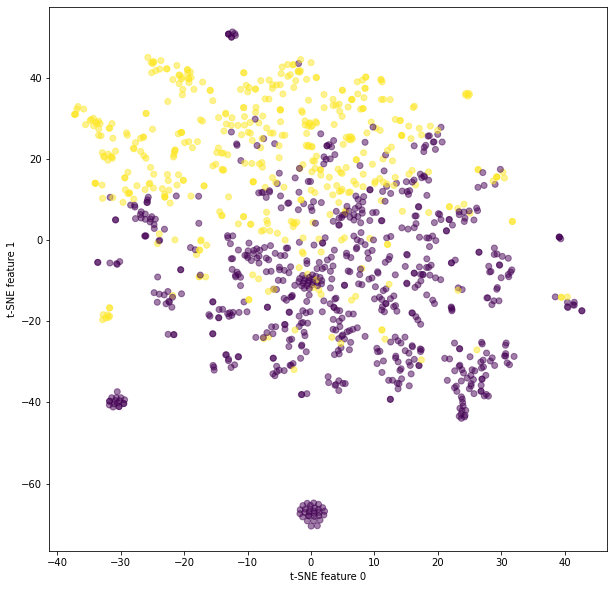

In [27]:
plt.figure(figsize=(10, 10))

plt.scatter(X_test_tnse[:, 0], X_test_tnse[:, 1], c=y_test, alpha=0.5)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")